<a href="https://colab.research.google.com/github/suparsanaagus/Guspar_tugasform/blob/main/03_modeling_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bag of Words Meets Bags of Popcorn : TF-IDF

## Table of Contents

1. [Introduction](#intro)<br>
2. [Reading the Data](#reading)<br>
3. [Text Preprocessing](#preprocessing)<br>
4. [TF-IDF](#tf-idf)<br>
5. [Visualization](#viz)<br>- [5.1. WordCloud](#wc)<br> - [5.2. Distribution](#dis)<br>
6. [Modeling](#modeling)<br>-

## 1. Introduction <a id='intro'></a>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca file Excel ke dalam DataFrame
file_path = '/content/drive/MyDrive/Job/Project/skripsi/sentiment-analysis_agus/bahan_bimbingan/Data Exploration/dataset/03_labeled_dataset.xlsx'
dataframe_final = pd.read_excel(file_path)

# Pastikan DataFrame memiliki kolom yang diperlukan
dataframe_final = dataframe_final[["created_at", "full_text", "preprocessed", "label"]]

# Bagi dataset menjadi 90% training dan 10% testing, dengan shuffle dan seed untuk replikasi
train_df, test_df = train_test_split(dataframe_final, test_size=0.1, random_state=42, shuffle=True)

# Simpan DataFrame ke file CSV
train_filename = '/content/drive/MyDrive/Job/Project/skripsi/sentiment-analysis_agus/bahan_bimbingan/Data Exploration/dataset/final_dataset/final_preprocessed_train_90percent.csv'
test_filename = '/content/drive/MyDrive/Job/Project/skripsi/sentiment-analysis_agus/bahan_bimbingan/Data Exploration/dataset/final_dataset/final_preprocessed_test_10percent.csv'

train_df.to_csv(train_filename, index=False)
test_df.to_csv(test_filename, index=False)

# Print informasi tentang persentase pembagian
print(f'Training set: {len(train_df)} rows ({len(train_df) / len(dataframe_final) * 100:.1f}%)')
print(f'Testing set: {len(test_df)} rows ({len(test_df) / len(dataframe_final) * 100:.1f}%)')
print(f'Saved training data to {train_filename}')
print(f'Saved testing data to {test_filename}')


Training set: 6970 rows (90.0%)
Testing set: 775 rows (10.0%)
Saved training data to /content/drive/MyDrive/Job/Project/skripsi/sentiment-analysis_agus/bahan_bimbingan/Data Exploration/dataset/final_dataset/final_preprocessed_train_90percent.csv
Saved testing data to /content/drive/MyDrive/Job/Project/skripsi/sentiment-analysis_agus/bahan_bimbingan/Data Exploration/dataset/final_dataset/final_preprocessed_test_10percent.csv


## 2. Reading the Data <a id='reading'></a>

In [ ]:
# Import libraries

import pandas as pd
import numpy as np

In [ ]:
# Read the data

X_train = pd.read_csv("/content/drive/MyDrive/Job/Project/skripsi/sentiment-analysis_agus/bahan_bimbingan/Data Exploration/dataset/final_dataset/final_preprocessed_train_90percent.csv", delimiter = ",")
X_test = pd.read_csv("/content/drive/MyDrive/Job/Project/skripsi/sentiment-analysis_agus/bahan_bimbingan/Data Exploration/dataset/final_dataset/final_preprocessed_test_10percent.csv",  delimiter = ",")

y_train = X_train["label"]
y_test = X_test["label"]

X_train, y_train


(                          created_at  \
 0     Thu Apr 18 07:34:05 +0000 2024   
 1     Wed Oct 25 08:13:08 +0000 2023   
 2     Tue Feb 27 07:27:48 +0000 2024   
 3     Wed Nov 29 16:04:44 +0000 2023   
 4     Sat Mar 16 03:00:00 +0000 2024   
 ...                              ...   
 6965  Sat Oct 21 14:59:27 +0000 2023   
 6966  Tue Jan 23 04:21:37 +0000 2024   
 6967  Sat Mar 02 19:07:09 +0000 2024   
 6968  Mon Apr 01 10:32:43 +0000 2024   
 6969  Tue Apr 09 06:57:37 +0000 2024   
 
                                               full_text  \
 0     Komisi Pemilihan Umum (KPU) tak menyangkal men...   
 1     IKA GMNI mengawal prosedur pencalonan Capres P...   
 2     Saya tidak termasuk yang mention beliau Loch ....   
 3     Telah terjadi pengkhianatan kekuasaan #gibran ...   
 4     Partai Demokrat mengusulkan kepada Prabowo Sub...   
 ...                                                 ...   
 6965  @_rakyatmerdeka Knapa golkar ngotot duetkan pr...   
 6966  @KompasTV Wajar gib

In [ ]:
# Pemetaan label ke angka
label_mapping = {
    "negatif": 0,
    "positif": 1,
    "netral": 2
}

# Ubah label di y_train dan y_test
y_train = y_train.map(label_mapping)
y_test = y_test.map(label_mapping)

# Cek hasil
print(y_train.head())
print(y_test.head())


0    1
1    1
2    2
3    0
4    2
Name: label, dtype: int64
0    1
1    1
2    1
3    0
4    0
Name: label, dtype: int64


**bold text**## 3. TF-IDF <a id='tf-idf'></a>

TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix).


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

In [ ]:
# analyzer is the parameter that the vectorizer reads the input data in word unit or character unit to create a matrix
# vocabulary is the parameter that the vectorizer creates the matrix by using only input data or some other source
# Other parameters are self-explanatory and already mentioned in other notebooks.

tv = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 40000)

In [ ]:
# Handle with care especially when you transform the test dataset. (Wrong: fit_transform(X_test))

train_tv = tv.fit_transform(X_train['preprocessed'])
test_tv = tv.transform(X_test['preprocessed'])

In [ ]:
# Create the list of vocabulary used for the vectorizer.

vocab = tv.get_feature_names_out()
print(vocab[:5])

['aanmuba' 'abadi' 'abadi pesantren' 'abah' 'abahanis']


In [ ]:
print("Vocabulary length:", len(vocab))

Vocabulary length: 40000


In [ ]:
dist = np.sum(train_tv, axis=0)
checking = pd.DataFrame(dist,columns = vocab)

In [ ]:
checking

,aanmuba,abadi,abadi pesantren,abah,abahanis,abahanis ganjarpranowo,abahanis ganjarpranowo ganjar,abai,abai konstitusi,abai konstitusi tp,...,zon kabar masuk,zonk,zulhas,zulkiflilubis,zulkiflilubis gibrantweet,zyzyitsme,zyzyitsme jokowi,zyzyitsme mimihmei,zyzyitsme mimihmei reskiichsan,zyzyitsme mpoklela
0,0.54931,0.646701,0.411049,1.645599,0.361476,0.361476,0.361476,2.749775,1.35475,1.096727,...,0.294287,0.504823,0.694886,3.275469,0.793487,3.13002,0.398323,0.574078,0.289951,0.34681


As you can see the above, due to the vocabulary option 'set(words.words())', a lot of vocabularies are added to the matrix even more than review's vocabularies.

In [ ]:
print('Training dim:',train_tv.shape, 'Test dim:', test_tv.shape)

Training dim: (6970, 40000) Test dim: (775, 40000)


The number of the feature of the matrix are almost ten times larger than the number of reviews. This can cause the curse of dimensionality but this project is for studying and trying many features of text mining tools so I decide to leave the option. Instead, the regularization term must be tuned with care when optimizing the parameters.

## 5. Visualization <a id='viz'></a>

### 5.1 WordCloud <a id='wc'></a>

As alluded in the first notebook, the drawback for WordCloud is that the graphics only reflect the frequency of words, which can cause some uninformative words frequently appeared in the text can be highlighted on the cloud instead of informative words which is less frequently appeared in the text. These kind of uninformative words could be stopwords or just some words frequently appeared in documents that particularly longer than other documents. Although the WordCloud is not the best visualization method to show all the aspect of the data, it is worth plotting them so that we can quickly and intuitively see what the text is about.

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [ ]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


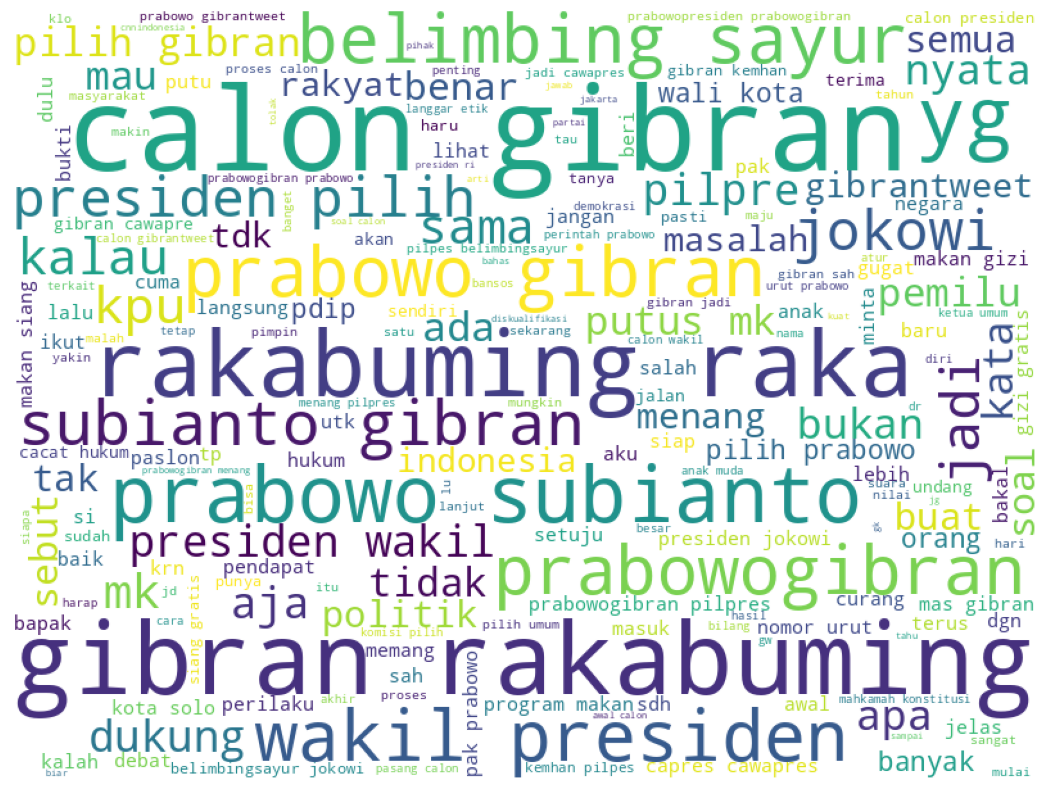

In [ ]:
cloud(' '.join(X_train['preprocessed']))

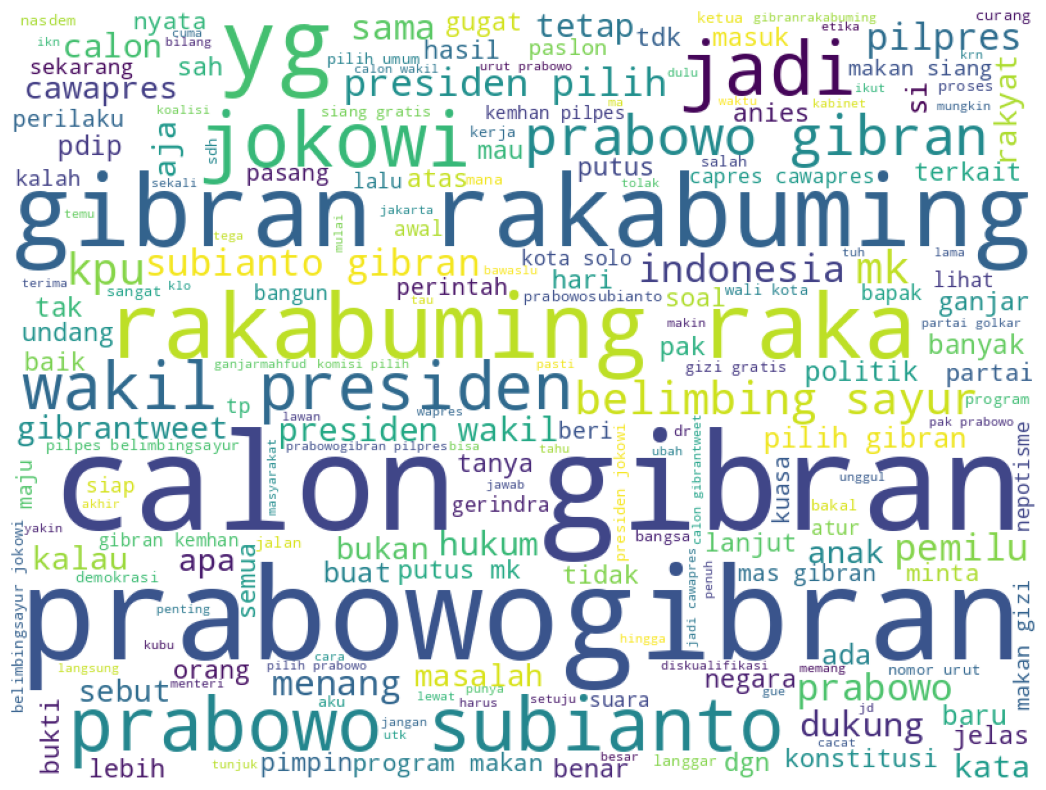

In [ ]:
cloud(' '.join(X_test['preprocessed']))

As expected, most of emphasized words are just normal words like "film", "one", "movie", "show", and "stori" which appear to be not informative to distinguish one document from the others or distinguish between negative and positive movie reviews.

### 5.2 Distribution <a id='dis'></a>

In [ ]:
# We need to split each words in cleaned review and then count the number of each rows of data frame.

X_train['freq_word'] = X_train['preprocessed'].apply(lambda x: len(str(x).split()))
X_train['unique_freq_word'] = X_train['preprocessed'].apply(lambda x: len(set(str(x).split())))

X_test['freq_word'] = X_test['preprocessed'].apply(lambda x: len(str(x).split()))
X_test['unique_freq_word'] = X_test['preprocessed'].apply(lambda x: len(set(str(x).split())))

<ipython-input-41-75cbd277f8dd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)


median of word frequency:  19.0


<ipython-input-41-75cbd277f8dd>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)


median of uniuqe word frequency:  18.0


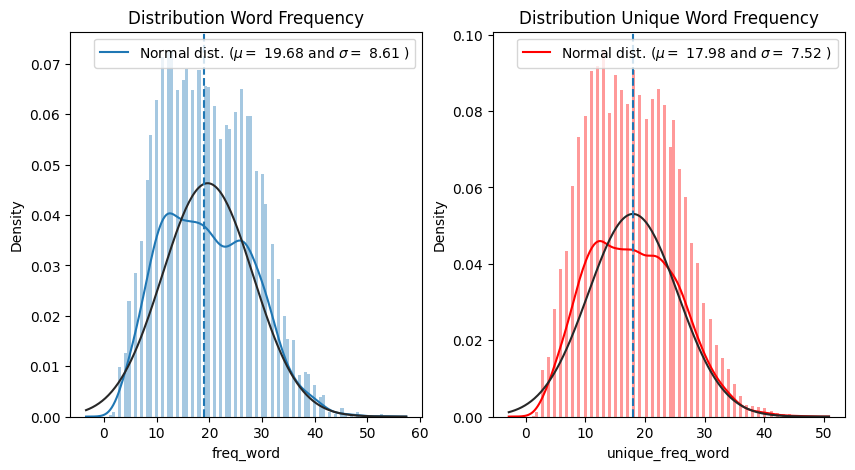

In [ ]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.distplot(X_train['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
(mu0, sigma0) = stats.norm.fit(X_train['freq_word'])
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(X_train['freq_word'].median(), linestyle='dashed')
print("median of word frequency: ", X_train['freq_word'].median())


sns.distplot(X_train['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
(mu1, sigma1) = stats.norm.fit(X_train['unique_freq_word'])
axes[1].set_title("Distribution Unique Word Frequency")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(X_train['unique_freq_word'].median(), linestyle='dashed')
print("median of uniuqe word frequency: ", X_train['unique_freq_word'].median())

## 6. Modeling <a id='modeling'></a>

As text data usually is very sparse and has a high dimensionality, using linear, and simple models such as Linear Support Vector Machine, Bernoulli Naive Bayes, Logistic Regression or MultiLayer Perceptron would be better choice rather than using Random Forest.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
kfold = StratifiedKFold( n_splits = 10,  shuffle = True, random_state = 42 )

### 6.3 Perceptron <a id='perceptron'></a>

In [ ]:
MLP = MLPClassifier(random_state = 42)

mlp_param_grid = {
    'hidden_layer_sizes':[(5, 5)],
    'activation':['relu'],
    'solver':['adam'],
    'alpha':[0.3],
    'learning_rate':['constant'],
    'max_iter':[1000]
}


gsMLP = GridSearchCV(MLP, param_grid = mlp_param_grid, cv = kfold, scoring = 'accuracy', n_jobs= 1, verbose = 1)
gsMLP.fit(train_tv,y_train)
print(gsMLP.best_params_)
mlp_best0 = gsMLP.best_estimator_

# {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.89996
# {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.89896
# {'activation': 'relu', 'alpha': 0.2, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.90284
# {'activation': 'relu', 'alpha': 0.3, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.90356

Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'activation': 'relu', 'alpha': 0.3, 'hidden_layer_sizes': (5, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


Confusion Matrix:
[[232  67   1]
 [ 53 352  10]
 [  9  34  17]]


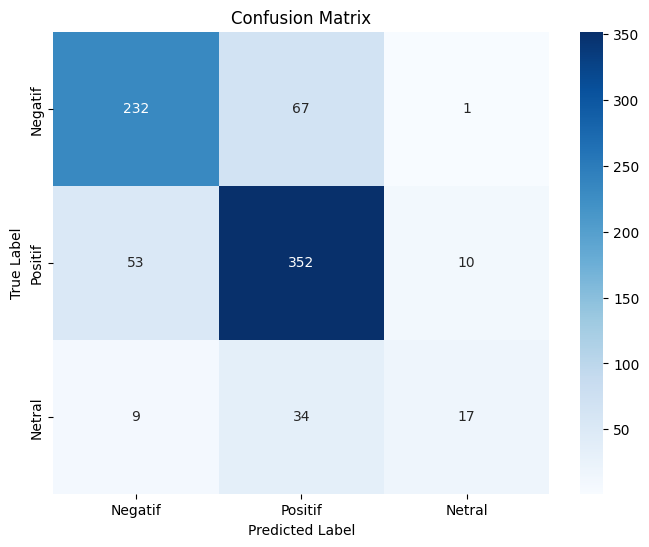


Classification Report:
              precision    recall  f1-score   support

     Negatif       0.79      0.77      0.78       300
     Positif       0.78      0.85      0.81       415
      Netral       0.61      0.28      0.39        60

    accuracy                           0.78       775
   macro avg       0.72      0.63      0.66       775
weighted avg       0.77      0.78      0.77       775



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi data uji menggunakan model terbaik
y_pred = mlp_best0.predict(test_tv)

# Tampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif', 'Netral'], yticklabels=['Negatif', 'Positif', 'Netral'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Positif', 'Netral']))
